number of passengers in original data 891


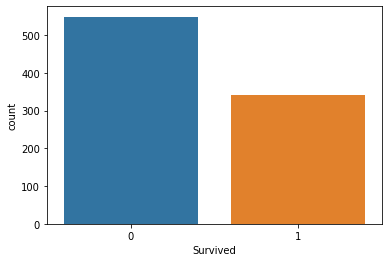

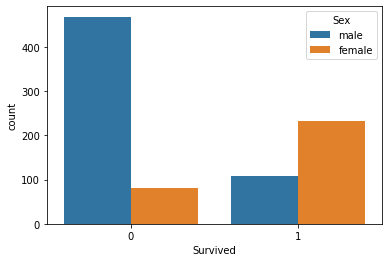

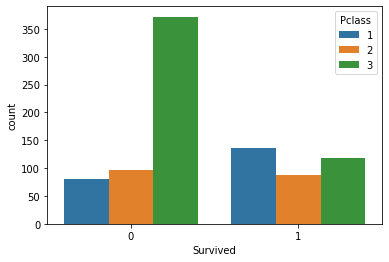

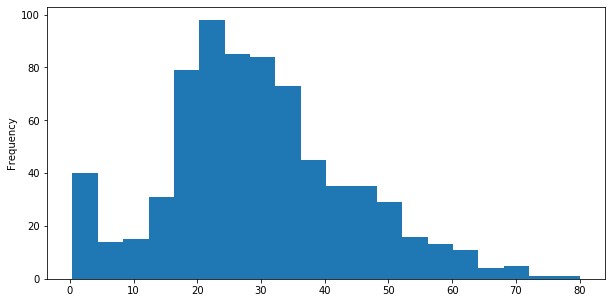

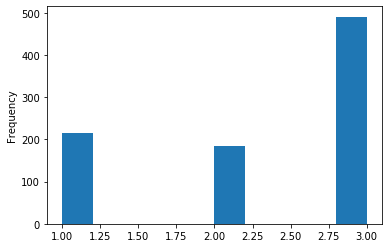

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


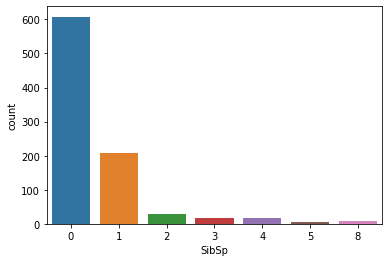

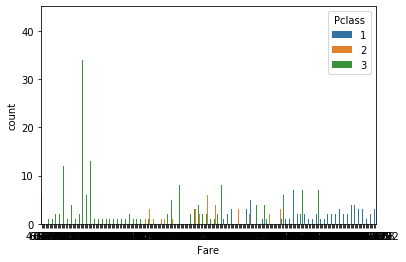

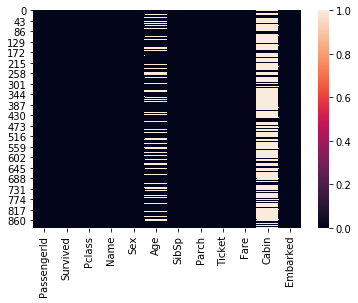

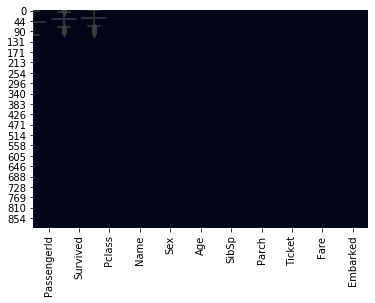

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7850467289719626

In [135]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

titanic_data=pd.read_csv("c:/users/dell/downloads/train.csv")

titanic_data.head(10)

print("number of passengers in original data "+str(len(titanic_data.index)))

#Analysing data

sns.countplot(x="Survived",data=titanic_data)
plt.show()
sns.countplot(x="Survived", hue="Sex", data=titanic_data)
plt.show()
sns.countplot(x="Survived",hue="Pclass",data=titanic_data)
plt.show()

titanic_data["Age"].plot.hist(bins=20,figsize=(10,5))
plt.show()
titanic_data["Pclass"].plot.hist()
plt.show()
titanic_data.info()

sns.countplot(x="SibSp",data=titanic_data)
plt.show()
sns.countplot(x="Fare",hue="Pclass",data=titanic_data)
plt.show()
#Data Wrangling

titanic_data.isnull().sum()

sns.heatmap(titanic_data.isnull())
plt.show()
sns.boxplot(x="Pclass",y="Age",data=titanic_data)

titanic_data.drop("Cabin", axis=1, inplace=True)

titanic_data.head(5)

titanic_data.dropna(inplace=True)

sns.heatmap(titanic_data.isnull(),cbar=False)
plt.show()

titanic_data.isnull().sum()

sex= pd.get_dummies(titanic_data["Sex"],drop_first=True)

sex.head(5)

embark=pd.get_dummies(titanic_data["Embarked"], drop_first=True)

embark.head(5)

Pcl=pd.get_dummies(titanic_data["Pclass"],drop_first=True)

Pcl.head(9)

titanic_data=pd.concat([titanic_data,sex,embark,Pcl],axis=1)

titanic_data.head(5)

Clean_data=titanic_data.drop(["PassengerId","Sex","Pclass","Name","Embarked","Ticket"],axis=1)

Clean_data.head(5)

#Training

X=Clean_data.drop("Survived",axis=1)
y=Clean_data["Survived"]

from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

from sklearn.linear_model import LogisticRegression

logmodel=LogisticRegression()

logmodel.fit(X_train, y_train)

predictions=logmodel.predict(X_test)

from sklearn.metrics import classification_report

classification_report(y_test, predictions)

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,predictions)

from sklearn.metrics import accuracy_score

accuracy_score(y_test,predictions)

In [136]:
#titanic data using logistic regrression


In [137]:
import numpy as np # linear algebra
import pandas as pd 

In [138]:
titanic_data=pd.read_csv("c:/users/dell/downloads/train.csv")

titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [139]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [140]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [141]:
# removing null values of age and embarked

titanic_data['Embarked']=titanic_data['Embarked'].replace(np.nan,'S')
median=titanic_data['Age'].median()

titanic_data['Age']=titanic_data['Age'].replace(np.nan,median)

In [142]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [143]:
# dealing with categorial values -----converting into numerical values by using labelencoder
from sklearn import preprocessing
le_sex=preprocessing.LabelEncoder()
le_sex.fit(titanic_data.Sex.unique())
titanic_data.Sex=le_sex.transform(titanic_data.Sex)

from sklearn import preprocessing
le_Embarked=preprocessing.LabelEncoder()
le_Embarked.fit(titanic_data.Embarked.unique())
titanic_data.Embarked=le_Embarked.transform(titanic_data.Embarked)

from sklearn import preprocessing
le_Pclass=preprocessing.LabelEncoder()
le_Pclass.fit(titanic_data.Pclass.unique())
titanic_data.Pclass=le_Pclass.transform(titanic_data.Pclass)

In [144]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,2,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,2,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,2,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


In [145]:
X=titanic_data.drop(["PassengerId","Name","Survived","Ticket","Cabin"],axis=1)
X.isnull().sum()
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2,1,22.0,1,0,7.2500,2
1,0,0,38.0,1,0,71.2833,0
2,2,0,26.0,0,0,7.9250,2
3,0,0,35.0,1,0,53.1000,2
4,2,1,35.0,0,0,8.0500,2


In [146]:
Y=titanic_data.iloc[:,1]

Y.isnull().sum()
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [147]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2,random_state=20)

from sklearn.linear_model import LogisticRegression

logmodel=LogisticRegression()

logmodel.fit(X_train, Y_train)

predictions=logmodel.predict(X_test)


C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [148]:
from sklearn.metrics import classification_report

classification_report(Y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.84      0.91      0.88       112\n           1       0.83      0.72      0.77        67\n\n    accuracy                           0.84       179\n   macro avg       0.84      0.81      0.82       179\nweighted avg       0.84      0.84      0.84       179\n'

In [149]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test,predictions)

array([[102,  10],
       [ 19,  48]], dtype=int64)

In [150]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test,predictions)

0.8379888268156425

In [ ]:
#titanic dataset with svm

In [154]:
# Titanic Dataset

import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

data = pd.read_csv(os.path.join('c:/users/dell/downloads/train.csv'))

print(data.head())
print(data.describe())
print(data.corr())
print(data.isnull().sum())
data.head()
data.describe()

# replace missing data (Age)
# convert to array
age = data['Age'].values
age = np.reshape(age,(-1,1))
#print(age)

imp = SimpleImputer(missing_values = np.nan , strategy='most_frequent')
imp.fit(age)
data['Age'] = imp.transform(age)
print(data.isnull().sum())

#convert label to int
data.Sex=data.Sex.astype('category').cat.codes
print(data.head())

# input and output data
features = data[["Pclass", "Fare", "Age"]]
target = data.Survived

#features scaling
scale = StandardScaler()
features = scale.fit_transform(features)
print(features[0,:])

# split data for training and testing
feature_train, feature_test, target_train, target_test = train_test_split(features,target, test_size=0.3, random_state=42)
print(feature_train.shape)
print(feature_test.shape)

#hyperparameter tuning (C)
parameters = { 'C':np.arange(1,11,0.5)}
svc = svm.SVC(gamma='auto')
SVM=GridSearchCV(svc, parameters)
SVM.fit(feature_train,target_train)
print(SVM.best_estimator_)

# prediction
predictions = SVM.predict(feature_test)
print(confusion_matrix(target_test, predictions))
print(accuracy_score(target_test,predictions))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


SVC(C=5.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
[[142  15]
 [ 67  44]]
0.6940298507462687
